(50, 2)


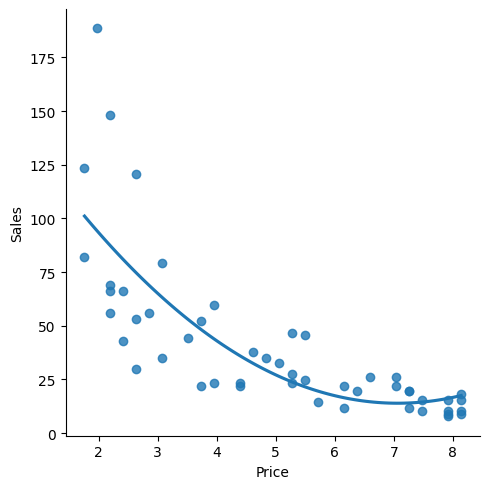

[[76.4237385 ]
 [10.26347962]
 [13.02015708]
 [65.39702869]
 [ 1.99344726]
 [ 4.75012472]
 [43.34360906]
 [57.12699633]
 [65.39702869]
 [15.77683453]
 [81.9370934 ]
 [73.66706104]
 [35.0735767 ]
 [13.02015708]
 [76.4237385 ]
 [32.31689925]
 [21.29018944]
 [37.83025415]
 [ 4.75012472]
 [26.80354434]
 [37.83025415]
 [40.58693161]
 [46.10028651]
 [54.37031887]
 [ 4.75012472]
 [ 1.99344726]
 [24.04686689]
 [70.91038359]
 [73.66706104]
 [70.91038359]
 [76.4237385 ]
 [ 1.99344726]
 [70.91038359]
 [10.26347962]
 [76.4237385 ]
 [35.0735767 ]
 [48.85696397]
 [13.02015708]
 [54.37031887]
 [48.85696397]
 [68.15370614]
 [81.9370934 ]
 [ 4.75012472]
 [59.88367378]
 [79.18041595]
 [37.83025415]
 [57.12699633]
 [26.80354434]
 [15.77683453]
 [ 1.99344726]]


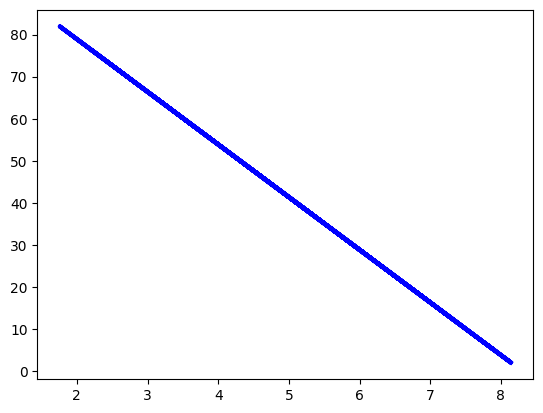

Mean Absolute Error: 16.8116708126875
Mean Squared Error: 649.1686230289548
Root Mean Squared Error: 25.478787707207633
R-squared: 0.526362004567087


In [29]:
from os import X_OK
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

data = pd.read_excel('data_transform.xlsx')
print(data.shape)
X = data[['Price']]
Y = data[['Sales']]
sns.lmplot(x='Price',y='Sales',data=data,order=2,ci=None)
plt.show()



X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)


lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)
print(Y_pred)

plt.plot(X,Y_pred,color='blue',linewidth=3)
plt.show()

mae= mean_absolute_error(Y,Y_pred)
mse= mean_squared_error(Y,Y_pred)
rmse= np.sqrt(mse)
R_squared = r2_score(Y,Y_pred)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-squared:',R_squared)





In [35]:

# Access the intercept and coefficients (slope)
intercept = lr.intercept_[0]
slope = lr.coef_[0][0]

print(f"Intercept: {round(intercept,2)}")
print(f"Slope: {round(slope,2)}")

Intercept: 103.99
Slope: -12.53


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


train_data = pd.read_csv('train_LR.csv')
test_data = pd.read_csv('test_LR.csv')
print(train_data.shape)
print(test_data.shape)




(109244, 13)
(36415, 13)


In [12]:
Features= ['Tier', 'FICO', 'Term','Amount','Previous_Rate', 'Competition_rate', 'Rate', 'Cost_Funds', 'Partner Bin', 'Car_Type_N','Car_Type_R','Car_Type_U']
target_column = 'Accept'
train_data = train_data.dropna(subset=Features + [target_column])
test_data = test_data.dropna(subset=Features + [target_column])
print(train_data.shape)
print(test_data.shape)

X_train = train_data[Features]
y_train = train_data[target_column]
X_test = test_data[Features]
y_test = test_data[target_column]
X_train.shape, y_train.shape, X_test.shape, y_test.shape




(109244, 13)
(36415, 13)


((109244, 12), (109244,), (36415, 12), (36415,))

In [16]:
count=0
Total=0
y_list = y_train.tolist()
for value in y_list:
  Total+=1
  if value == 1:
    count+=1
print(count)
print(Total)
print(round((count/Total)*100,2))

23986
109244
21.96


In [17]:
count=0
Total=0
y_list = y_test.tolist()
for value in y_list:
  Total+=1
  if value == 1:
    count+=1
print(count)
print(Total)
print(round((count/Total)*100,2))

8065
36415
22.15


In [26]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler for scaling

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform on training data
X_test = scaler.transform(X_test) # Transform test data using the same scaler

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred1= logreg.predict(X_train)
y_pred2= logreg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred1)
print(f"Accuracy of the Train Logistic Regression Model: {round(accuracy,2)}")
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy of the Test Logistic Regression Model: {round(accuracy,2)}")

Accuracy of the Train Logistic Regression Model: 0.83
Accuracy of the Test Logistic Regression Model: 0.83
